# Data Modeling

## Load the Data and Select the Features

### Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and Check the Data

Import the dataset output from the previous preparation notebook

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

/var/folders/hn/11hmxl5x72jg2t7k7m1krds80000gn/T/ipykernel_14161/3343578540.py:1: DtypeWarning: Columns (124,125,126,129,130,131,134,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)


Check the number of columns and rows of the datasets in case of errors

In [3]:
loan_data_inputs_train.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:26.4-30.7,dti:30.7-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-15,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,NaN,NaN,15000,15000,15000.0,36 months,14.16,513.84,C,C2,...,0,0,0,0,0,0,0,1,0,0
1040257,NaN,NaN,11000,11000,11000.0,36 months,8.18,345.62,B,B1,...,0,0,0,1,0,0,0,0,0,0
870512,NaN,NaN,10000,10000,10000.0,36 months,11.39,329.24,B,B3,...,0,0,0,1,0,0,0,0,0,0
199952,NaN,NaN,10000,10000,10000.0,36 months,10.08,323.05,B,B1,...,0,0,0,0,0,0,0,1,0,0
1098582,NaN,NaN,7225,7225,7225.0,36 months,15.61,252.63,D,D1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
loan_data_inputs_train.shape

(1808534, 388)

In [5]:
loan_data_targets_train.head(5)

,nondefault_default
2064503,1
1040257,1
870512,1
199952,1
1098582,0


In [6]:
loan_data_targets_train.shape

(1808534, 1)

In [7]:
loan_data_inputs_test.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:26.4-30.7,dti:30.7-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-15,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
867991,NaN,NaN,5600,5600,5550.0,36 months,12.74,187.99,C,C1,...,0,0,0,1,0,0,0,0,0,0
1604283,NaN,NaN,36000,36000,36000.0,60 months,16.02,875.84,C,C5,...,0,0,0,1,0,0,0,0,0,0
541720,NaN,NaN,7200,7200,7200.0,36 months,15.59,251.68,C,C5,...,1,0,0,1,0,0,0,0,0,0
1937204,NaN,NaN,20000,20000,19900.0,36 months,12.49,668.98,B,B5,...,0,0,0,1,0,0,0,0,0,0
1783114,NaN,NaN,21000,21000,21000.0,36 months,12.12,698.71,B,B3,...,0,0,0,1,0,0,0,0,0,0


In [8]:
loan_data_inputs_test.shape

(452134, 388)

In [9]:
loan_data_targets_test.head(5)

,nondefault_default
867991,1
1604283,1
541720,1
1937204,0
1783114,1


In [10]:
loan_data_targets_test.shape

(452134, 1)

### Select the Features

Show all columns of the dataset **loan_data_inputs_train**

In [11]:
pd.options.display.max_columns = None
loan_data_inputs_train.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Select variable needed for Probability Default model

In [12]:
selected_explanatory_variables = [
    # grade
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    # home_ownership
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    # addr_state
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'addr_state:NM_HI_SD',
    'addr_state:NY',
    'addr_state:FL',
    'addr_state:MO_MD_NC_TN_NJ_IN',
    'addr_state:CA',
    'addr_state:PA_MI_KY',
    'addr_state:VA_AK_MN_OH_AZ',
    'addr_state:TX',
    'addr_state:NE_DE',
    'addr_state:MA_WI_UT',
    'addr_state:GA_WY_RI_IL_MT',
    'addr_state:CT_WA_KS_ND_CO_SC',
    'addr_state:WV_NH_DC_OR_VT_ID_ME',
    # verification_status
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    # purpose
    'purpose:edu_smbus_rnenergy_mov',
    'purpose:debt_consolidation',
    'purpose:med_oth_wed_vac_hou_mjpur_hmimpr',
    'purpose:credit_card',
    'purpose:car',
    # initial_list_status
    'initial_list_status:f',
    'initial_list_status:w',
    # term
    'term:36',
    'term:60',
    # emp_length
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-6',
    'emp_length:7',
    'emp_length:8-9',
    'emp_length:10',
    # mths_since_issue_d
    'mths_since_issue_d:<2',
    'mths_since_issue_d:3-5',
    'mths_since_issue_d:6-7',
    'mths_since_issue_d:8-15',
    'mths_since_issue_d:16-45',
    'mths_since_issue_d:46-65',
    'mths_since_issue_d:>65',
    # int_rate
    'int_rate:<10.446',
    'int_rate:10.446-13.014',
    'int_rate:13.014-17.123',
    'int_rate:17.123-22.772',
    'int_rate:>22.772',
    # mths_since_earliest_cr_line
    'mths_since_earliest_cr_line:<142',
    'mths_since_earliest_cr_line:142-162',
    'mths_since_earliest_cr_line:163-244',
    'mths_since_earliest_cr_line:245-284',
    'mths_since_earliest_cr_line:285-345',
    # delinq_2yrs
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'delinq_2yrs:>3',
    # inq_last_6mths
    'inq_last_6mths:0',
    'inq_last_6mths:1-3',
    'inq_last_6mths:>3',
    # open_acc
    'open_acc:<4',
    'open_acc:4-9',
    'open_acc:10-22',
    'open_acc:23-34',
    'open_acc:>34',
    # pub_rec
    'pub_rec:<2',
    'pub_rec:2-5',
    'pub_rec:>5',
    # total_acc
    'total_acc:<22',
    'total_acc:22-56',
    'total_acc:>56',
    # acc_now_delinq
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    # total_rev_hi_lim
    'total_rev_hi_lim:<5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-50K',
    'total_rev_hi_lim:50K-100K',
    'total_rev_hi_lim:>=100K',
    # annual_inc
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>=140K',
    # dti
    'dti:<1.9',
    'dti:1.9-4.8',
    'dti:4.8-6.9',
    'dti:6.9-10.5',
    'dti:10.5-12.7',
    'dti:12.7-15.6',
    'dti:15.6-19.2',
    'dti:19.2-24.2',
    'dti:24.2-26.4',
    'dti:26.4-30.7',
    'dti:30.7-35',
    'dti:>35',
    # mths_since_last_delinq
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-18',
    'mths_since_last_delinq:19-67',
    'mths_since_last_delinq:>=68',
    # mths_since_last_record
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-15',
    'mths_since_last_record:16-25',
    'mths_since_last_record:26-38',
    'mths_since_last_record:39-87',
    'mths_since_last_record:88-108',
    'mths_since_last_record:>108']

Select the reference case for each category

In [13]:
reference_category = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'verification_status:Verified',
    'purpose:edu_smbus_rnenergy_mov',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>65',
    'int_rate:>22.772',
    'mths_since_earliest_cr_line:<142',
    'delinq_2yrs:>3',
    'inq_last_6mths:>3',
    'open_acc:<4',
    'pub_rec:<2',
    'total_acc:<22',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<5K',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-18',
    'mths_since_last_record:0-15']

In [14]:
input_train_with_refer_categ = loan_data_inputs_train.loc[: , selected_explanatory_variables]
inputs_train = input_train_with_refer_categ.drop(reference_category, axis = 1)
inputs_train.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,pub_rec:2-5,pub_rec:>5,total_acc:22-56,total_acc:>56,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,False,False,True,False,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,True,False,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1040257,False,True,False,False,False,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
870512,False,True,False,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,True,False,False,0,True,False,True,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
199952,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,0,1,0,0,False,True,False,1,False,False,True,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1098582,False,False,False,True,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,False,True,True,0,False,False,False,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2194248,False,False,False,True,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,True,False,True,0,False,False,True,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1013682,False,False,False,False,True,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1649058,False,False,False,False,False,True,True,False,0,False,False,0,False,0,0,False,0,0,0,

In [15]:
inputs_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1808534 entries, 2064503 to 1031523
Data columns (total 99 columns):
 #   Column                                    Non-Null Count    Dtype
---  ------                                    --------------    -----
 0   grade:A                                   1808534 non-null  bool 
 1   grade:B                                   1808534 non-null  bool 
 2   grade:C                                   1808534 non-null  bool 
 3   grade:D                                   1808534 non-null  bool 
 4   grade:E                                   1808534 non-null  bool 
 5   grade:F                                   1808534 non-null  bool 
 6   home_ownership:OWN                        1808534 non-null  bool 
 7   home_ownership:MORTGAGE                   1808534 non-null  bool 
 8   addr_state:NM_HI_SD                       1808534 non-null  int64
 9   addr_state:NY                             1808534 non-null  bool 
 10  addr_state:FL                

## Probability Default Model Estimation

### Import Libraries

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm

### Logistic Regression

In [42]:
log_reg = LogisticRegression()
log_reg.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [43]:
pd.options.display.max_columns = None

feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(log_reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_reg.intercept_[0]]
summary_table = summary_table.sort_index()

with pd.option_context('display.max_rows', None,):
    print(summary_table)

                                Feature name  Coefficients
0                                  Intercept     -0.197794
1                                    grade:A      1.257021
2                                    grade:B      0.692859
3                                    grade:C      0.440156
4                                    grade:D      0.224254
5                                    grade:E      0.086989
6                                    grade:F     -0.043098
7                         home_ownership:OWN      0.110897
8                    home_ownership:MORTGAGE      0.252770
9                        addr_state:NM_HI_SD      0.130375
10                             addr_state:NY      0.097162
11                             addr_state:FL      0.098985
12              addr_state:MO_MD_NC_TN_NJ_IN      0.121314
13                             addr_state:CA      0.149157
14                       addr_state:PA_MI_KY      0.180865
15                 addr_state:VA_AK_MN_OH_AZ      0.1884

In [44]:
inputs_train_with_intercept = sm.add_constant(inputs_train)
logit_model = sm.Logit(loan_data_targets_train.astype(bool), inputs_train_with_intercept.astype(bool)).fit(method="lbfgs")
print(logit_model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           99     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.74394D-01

At iterate    1    f=  3.92508D-01    |proj g|=  6.06669D-02

At iterate    2    f=  3.73726D-01    |proj g|=  3.66728D-02

At iterate    3    f=  3.61847D-01    |proj g|=  2.41850D-02

At iterate    4    f=  3.57931D-01    |proj g|=  1.97140D-02

At iterate    5    f=  3.49659D-01    |proj g|=  1.63127D-02

At iterate    6    f=  3.41122D-01    |proj g|=  8.39106D-03

At iterate    7    f=  3.37336D-01    |proj g|=  3.08191D-03

At iterate    8    f=  3.36341D-01    |proj g|=  3.05870D-03

At iterate    9    f=  3.35469D-01    |proj g|=  3.06283D-03

At iterate   10    f=  3.34786D-01    |proj g|=  1.34550D-03

At iterate   11    f=  3.34611D-01    |proj g|=  2.45878D-03

At iterate   12    f=  3.34484D-01    |proj g|=  1.03041D-03

At iterate   13    f=  3.3

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:     nondefault_default   No. Observations:              1808534
Model:                          Logit   Df Residuals:                  1808435
Method:                           MLE   Df Model:                           98
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                  0.1168
Time:                        04:08:00   Log-Likelihood:            -6.0367e+05
converged:                      False   LL-Null:                   -6.8353e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
grade:A                                      1.2518      0.034     37.295      0.000       1.186       1.318
grade:B                                  

## Out-of-sample Validation on Test Dataset

In [45]:
input_test_with_refer_categ = loan_data_inputs_test.loc[: , selected_explanatory_variables]
inputs_test = input_test_with_refer_categ.drop(reference_category, axis = 1)
inputs_test.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,pub_rec:2-5,pub_rec:>5,total_acc:22-56,total_acc:>56,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
867991,False,False,True,False,False,False,False,True,0,True,False,0,False,0,0,False,0,0,0,0,0,False,True,False,1,False,False,False,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1604283,False,False,True,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
541720,False,False,True,False,False,False,False,False,0,False,False,0,False,1,0,False,0,0,0,0,0,False,False,False,1,False,False,True,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1937204,False,True,False,False,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,False,False,False,0,True,False,False,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0
1783114,False,True,False,False,False,False,False,True,0,False,True,0,False,0,0,False,0,0,0,0,0,False,True,False,0,True,False,False,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1743673,False,False,True,False,False,False,False,True,0,False,False,0,False,0,0,False,1,0,0,0,0,False,False,False,0,True,False,True,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0
722352,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,True,0,0,0,0,0,False,True,False,0,True,False,True,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
648621,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,1,0,

In [46]:
y_hat_test = log_reg.predict(inputs_test)

In [47]:
y_hat_test_prob = log_reg.predict_proba(inputs_test)
y_hat_test_prob = y_hat_test_prob[: ][: , 1]
y_hat_test_prob

array([0.88814363, 0.86482871, 0.73550123, ..., 0.88331672, 0.82590297,
       0.85003549])

In [48]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_prob = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test), pd.DataFrame(y_hat_test_prob)], axis = 1)
df_actual_predicted_prob.columns = ['loan_data_targets_test', 'y_hat_test', 'y_hat_test_prob']
df_actual_predicted_prob.shape

(452134, 3)

In [49]:
df_actual_predicted_prob.index = loan_data_inputs_test.index
df_actual_predicted_prob.head(20)

,loan_data_targets_test,y_hat_test,y_hat_test_prob
867991,1,1,0.888144
1604283,1,1,0.864829
541720,1,1,0.735501
1937204,0,1,0.856534
1783114,1,1,0.908206
1743673,1,1,0.839176
722352,1,1,0.853885
648621,1,1,0.912117
1844143,1,1,0.773458
2212497,1,1,0.987801


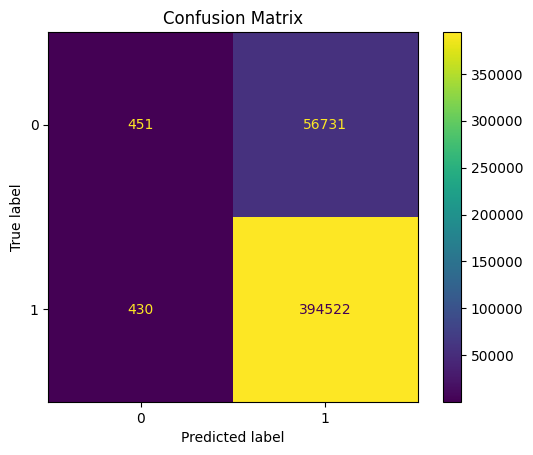

In [53]:
cm = confusion_matrix(loan_data_targets_test, y_hat_test, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()